In [32]:
import pandas
from scipy.fft import fft
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

Text(0, 0.5, 'Red signal')

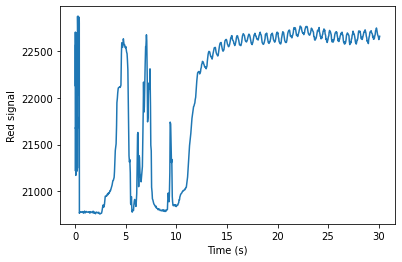

In [33]:
df = pandas.read_csv('/Users/mtw/Documents/Visual studio code/Oximeter-data 20210430/PO_20210430_1642.csv',',',header=0, index_col=False)
#Interesting files include
# '/Users/mtw/Documents/Visual studio code/Oximeter-data 20210430/PO_20210430_1612.csv'

df.time=df.time-min(df.time)

plt.plot(df.time,df.r)
plt.xlabel('Time (s)')
plt.ylabel('Red signal')

Text(0, 0.5, 'Amplitude (a.u.)')

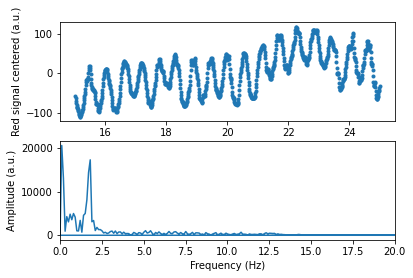

In [109]:
stepsize=0.01
t_min=15
t_max=25


#count=int(np.floor(t_max/stepsize))
t=np.arange(t_min,t_max,stepsize)
index_range=np.where((t_min<t) & (t_max>t))

funct = interpolate.interp1d(df.time, df.r,'cubic')
z=funct(t)

t_crop=np.zeros(np.size(index_range))
z_crop=np.zeros(np.size(index_range))

t_crop=t[index_range]
z_crop=z[index_range]

z_crop=z_crop-np.mean(z_crop)

fft_amp=abs(np.fft.fft(z_crop))
#fft_amp=fft_amp[0:int(np.floor(len(fft_amp)/2))]

freq = np.fft.fftfreq(fft_amp.size, d=stepsize)

fig, (ax1, ax2) = plt.subplots(2)

#plt.subplot(df.time,df.r,'.')      plot of real data, not interpolated
#plt.xlim(16,18)

ax1.plot(t_crop,z_crop,'.')
ax1.set_xlabel('Time (s))')
ax1.set_ylabel('Red signal centered (a.u.)')

ax2.plot(freq,fft_amp)
ax2.set_xlim(0,20)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude (a.u.)')



The frequency of the peaks are (Hz):
[ 0.1001001  1.8018018 -1.8018018]


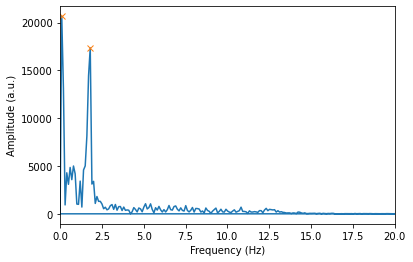

In [110]:
threshold=15000

plt.plot()

plt.plot(freq,fft_amp)
plt.xlim(0,20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')

peaks, _ = find_peaks(fft_amp, height=threshold)
plt.plot(freq[peaks], fft_amp[peaks], "x")

print('The frequency of the peaks are (Hz):')
print(freq[peaks])

The frequency of the peaks are (Hz):
[ 4. -4.]


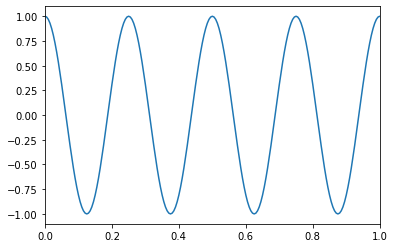

In [106]:
test=np.arange(0,10,.005)
test_threshold=.5

f_test=np.cos(2*np.pi*test*4)

test_amp=abs(np.fft.fft(f_test))
#test_amp=test_amp[0:int(np.floor(len(f_test)/2))]

freq_test = np.fft.fftfreq(test_amp.size, d=.005)
peaks, _ = find_peaks((test_amp), height=test_threshold)

plt.plot()
#plt.plot(freq_test,test_amp,'.')
#plt.plot(freq_test[peaks], test_amp[peaks], "x")
plt.xlim(0,1)

plt.plot(test,f_test)

print('The frequency of the peaks are (Hz):')
print(freq_test[peaks])